In [1]:
function get_random_graph(n::Int, p::Float64)
    G = []
    nodes = range(1,length=n)
    for node in nodes
        new_edges = []
        for i in nodes
           if i == node
               0 
            elseif p >= rand()
                push!(new_edges, i)
            end
        end
        push!(G, new_edges)
    end
    return G
end

function BFS(G)
    ls = length(G)
    s = 1
    discovered = zeros(Int8,ls)
    discovered[s] = 1
    L = [s]
    BFS_len = 1
    while L != []
       L_1 = []
        for u in L
           for v in G[u]
               if discovered[v] == 0
                    discovered[v] = 1
                    push!(L_1, v)
                    BFS_len += 1
                end
            end
        end
        L = L_1
    end
    return BFS_len
end

BFS (generic function with 1 method)

In [2]:
A = get_random_graph(1000, 0.04)
BFS(A)

1000

In [6]:
n_test = range(10^3, 6*10^3,length=8)
p_test = range(0.001, 0.003, length=20)
tests = Array{Float64}(undef, length(n_test),length(p_test))
iterations = 7

function convex_graph(n,p)
    G = get_random_graph(n, p)
    L_G = BFS(G)
    if n == L_G
        return 1
    else
        return 0
    end
end

for n in range(1, length(n_test), step=1)
   for p in range(1, length(p_test), step=1)
        positives = 0
        for i in range(1,iterations,step=1)
            positives += convex_graph(convert(Int, floor(n_test[n])), p_test[p])
        end
        tests[n,p] = positives/iterations
    end
end

In [7]:
tests

8×20 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0       0.0       0.0     
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0       0.0     
 0.0  0.0  0.0  0.0  0.0       0.0          0.142857  0.285714  0.285714
 0.0  0.0  0.0  0.0  0.0       0.0          0.428571  0.714286  0.571429
 0.0  0.0  0.0  0.0  0.0       0.0          0.857143  0.857143  0.714286
 0.0  0.0  0.0  0.0  0.0       0.0       …  1.0       1.0       1.0     
 0.0  0.0  0.0  0.0  0.142857  0.142857     1.0       1.0       1.0     
 0.0  0.0  0.0  0.0  0.142857  0.857143     1.0       1.0       1.0     

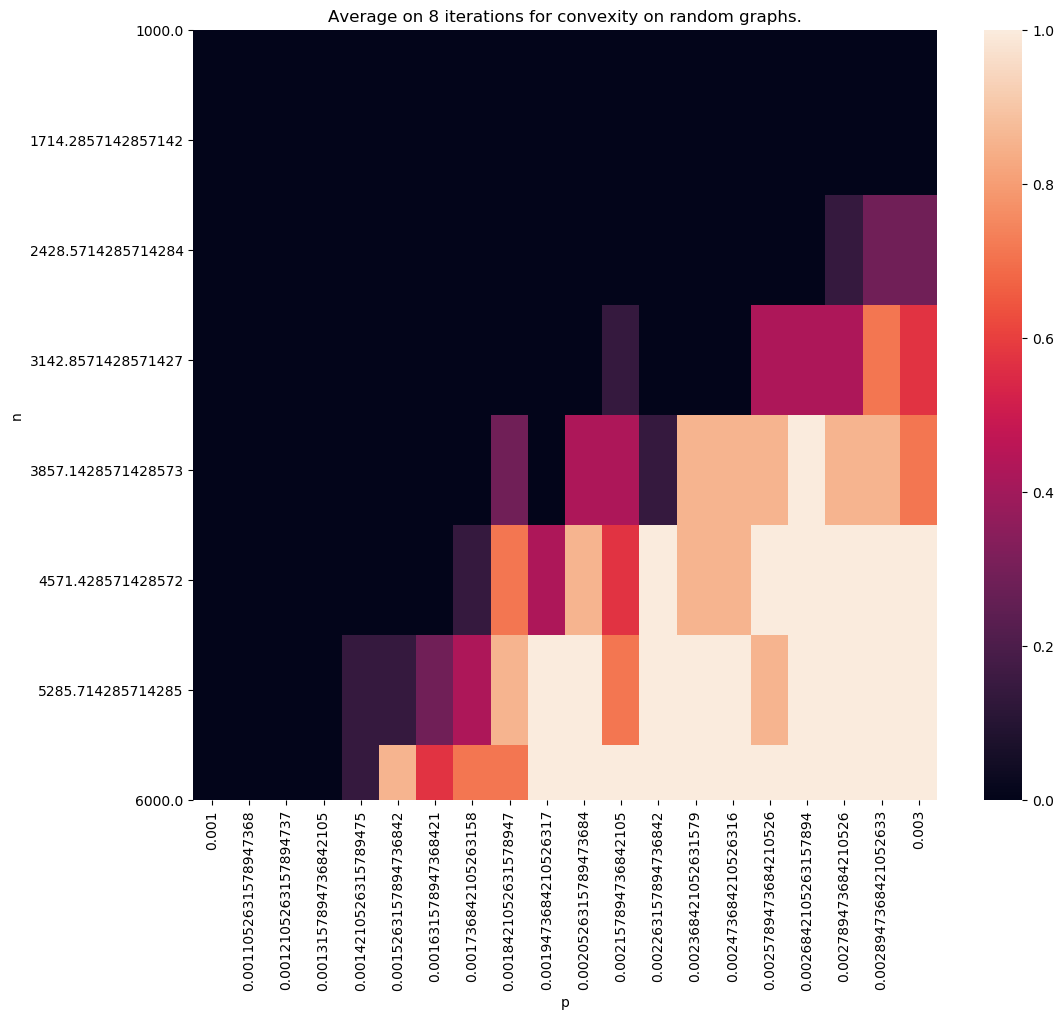

In [12]:
import Seaborn; const sns = Seaborn
import PyPlot; const plt = PyPlot

fig, axs = plt.subplots(figsize=(12,10))
heat = sns.heatmap((tests), vmin=0, ax=axs, xticklabels=p_test, yticklabels=n_test)
axs.set(xlabel="p", ylabel="n", title="Average on 8 iterations for convexity on random graphs.")
plt.show()